In [1]:
#import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import warnings
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, MaxPooling2D
from keras.layers import Conv2D, MaxPooling2D
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)

r_seed = 42
np.random.seed(r_seed)
tf.random.set_seed(r_seed)

In [2]:
columns=['user','activity','time','x','y','z']

directory = r'E:\Advanced Decision Making\data\wisdm-dataset\raw'

data_all = pd.DataFrame(data=None,columns=columns)
             
for dir1 in os.listdir(directory):
    directory1 = os.path.join(directory,dir1)
    
    for dir2 in os.listdir(directory1):
        directory2 = os.path.join(directory1,dir2)
        
        for filename in os.listdir(directory2):
            f = os.path.join(directory2,filename)
            df = pd.read_csv(f, sep=',',header=None)  
            temp=pd.DataFrame(data=df.values, columns=columns)
            data_all=pd.concat([data_all,temp])

In [3]:
data_all['z'] = data_all['z'].str.replace(';','')
data_all['activity'].value_counts()
data_all['x']=data_all['x'].astype('float')
data_all['y']=data_all['y'].astype('float')
data_all['z']=data_all['z'].astype('float')


In [4]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15630426 entries, 0 to 66555
Data columns (total 6 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user      object 
 1   activity  object 
 2   time      object 
 3   x         float64
 4   y         float64
 5   z         float64
dtypes: float64(3), object(3)
memory usage: 834.8+ MB


In [5]:
activities = data_all['activity'].value_counts().index
data_all = data_all.drop(['user', 'time'], axis=1)

df_a = data_all[data_all['activity']=='A'].head(174604)
df_m = data_all[data_all['activity']=='M'].head(174604)
df_k = data_all[data_all['activity']=='K'].head(174604)
df_p = data_all[data_all['activity']=='P'].head(174604)
df_e = data_all[data_all['activity']=='E'].head(174604)
df_o = data_all[data_all['activity']=='O'].head(174604)
df_c = data_all[data_all['activity']=='C'].head(174604)
df_d = data_all[data_all['activity']=='D'].head(174604)
df_l = data_all[data_all['activity']=='L'].head(174604)
df_b = data_all[data_all['activity']=='B'].head(174604)
df_h = data_all[data_all['activity']=='H'].head(174604)
df_f = data_all[data_all['activity']=='F'].head(174604)
df_g = data_all[data_all['activity']=='G'].head(174604)
df_q = data_all[data_all['activity']=='Q'].head(174604)
df_r = data_all[data_all['activity']=='R'].head(174604)
df_s = data_all[data_all['activity']=='S'].head(174604)
df_i = data_all[data_all['activity']=='I'].head(174604)
df_j = data_all[data_all['activity']=='J'].head(174604)

balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([df_a,df_m,df_k,df_p,df_e,df_o,df_c,df_d,df_l,df_b,df_h,df_f,df_g,df_q,df_r,df_s,df_i,df_j]) 


In [6]:
balanced_data['label'] = LabelEncoder().fit_transform(balanced_data['activity']) 

x = balanced_data[['x','y','z']]
y = balanced_data['label']
x = StandardScaler().fit_transform(x)

scaled_x = pd.DataFrame(data=x, columns=['x','y','z'])
scaled_x['label'] = y.values

In [7]:
def get_frames(df, frame_size, hop_size):
    
    N_FEATURES = 3
    frames = []
    labels = []
    for i in range(0,len(df)- frame_size, hop_size):
        x = df['x'].values[i: i+frame_size]
        y = df['y'].values[i: i+frame_size]
        z = df['z'].values[i: i+frame_size]
        
        label = stats.mode(df['label'][i: i+frame_size])[0][0]
        frames.append([x,y,z])
        labels.append(label)
        
    frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
    labels = np.asarray(labels).reshape(-1,1)
    
    return frames, labels

In [8]:
Fs=20
frame_size = Fs*4
hop_size = Fs*2

x,y = get_frames(scaled_x, frame_size, hop_size)

In [9]:
X_tr, X_te, Y_tr, Y_te = train_test_split(x,y,test_size=0.20, random_state = r_seed, stratify = y)

X_tr_samples = X_tr.shape[0]
X_te_samples = X_te.shape[0]

X_tr = X_tr.reshape(X_tr_samples, 80, 3,1)
X_te = X_te.reshape(X_te_samples, 80, 3,1)

In [31]:
#CNN
model = Sequential()
model.add(Conv2D(512, (2,2), activation = 'relu', input_shape = X_tr[0].shape))
model.add(Dropout(0.2))

model.add(Conv2D(256, (2,2), activation = 'relu'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(18, activation='softmax'))
model.summary()
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 79, 2, 512)        2560      
                                                                 
 dropout_23 (Dropout)        (None, 79, 2, 512)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 78, 1, 256)        524544    
                                                                 
 dropout_24 (Dropout)        (None, 78, 1, 256)        0         
                                                                 
 flatten_6 (Flatten)         (None, 19968)             0         
                                                                 
 dense_17 (Dense)            (None, 512)               10224128  
                                                                 
 dropout_25 (Dropout)        (None, 512)              

In [32]:
history = model.fit(X_tr, Y_tr, epochs = 20, validation_data=(X_te, Y_te), verbose=1 )

Epoch 1/20
1965/1965 [==============================] - 15s 7ms/step - loss: 1.7587 - accuracy: 0.3744 - val_loss: 1.3452 - val_accuracy: 0.5236
Epoch 2/20
1965/1965 [==============================] - 14s 7ms/step - loss: 1.2035 - accuracy: 0.5730 - val_loss: 0.9154 - val_accuracy: 0.6740
Epoch 3/20
1965/1965 [==============================] - 14s 7ms/step - loss: 0.9374 - accuracy: 0.6638 - val_loss: 0.7741 - val_accuracy: 0.7313
Epoch 4/20
1965/1965 [==============================] - 15s 7ms/step - loss: 0.7988 - accuracy: 0.7134 - val_loss: 0.7200 - val_accuracy: 0.7563
Epoch 5/20
1965/1965 [==============================] - 14s 7ms/step - loss: 0.7120 - accuracy: 0.7426 - val_loss: 0.6565 - val_accuracy: 0.7725
Epoch 6/20
1965/1965 [==============================] - 14s 7ms/step - loss: 0.6528 - accuracy: 0.7673 - val_loss: 0.6497 - val_accuracy: 0.7819
Epoch 7/20
1965/1965 [==============================] - 14s 7ms/step - loss: 0.6044 - accuracy: 0.7829 - val_loss: 0.6383 - val_ac

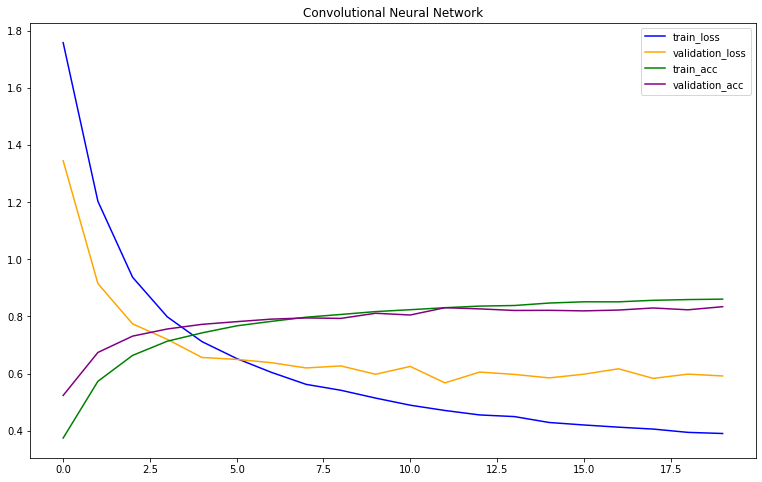

In [34]:
plt.figure(figsize=(13, 8))
plt.plot(history.history['loss'], label='train_loss',color='blue')
plt.plot(history.history['val_loss'], label='validation_loss',color='orange')
plt.plot(history.history['accuracy'], label='train_acc',color='green')
plt.plot(history.history['val_accuracy'], label='validation_acc',color='purple')
plt.title('Convolutional Neural Network')

plt.legend()